In [1]:
import pandas as pd
import numpy as np


location = "Datasets/titanic3.xls"
df = pd.read_excel(location)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Reorganizing Dataframe + Variables

In [2]:
df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [3]:
print(df.shape)
df.isnull().sum()

(1309, 14)


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [4]:
# drop embarkment missing data 

df.dropna(subset = ['embarked'], inplace=True)
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1186
home.dest     563
dtype: int64


In [5]:
# missing data in age variable

df["age"].fillna(df.groupby("sex")["age"].transform("mean"), inplace=True)
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1186
home.dest     563
dtype: int64


In [6]:
# determine value counts for cabin and boat

print(pd.value_counts(df['boat']))
print(pd.value_counts(df['cabin']))

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
8          23
16         23
7          23
D          20
12         19
6          18
2          12
A          11
B           9
1           5
C D         2
13 15       2
5 7         2
8 10        1
5 9         1
13 15 B     1
15 16       1
2           1
Name: boat, dtype: int64
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C22 C26            4
F4                 4
F33                4
B96 B98            4
C78                4
F2                 4
D                  4
A34                3
E34                3
C101               3
B58 B60            3
B51 B53 B55        3
E101               3
E67                2
C2                 2
D35                2
B78                2
C83                2
D17                2
C31                2
C85                2
B35                2
B41                2
C32                2
C106            

In [7]:
# identify those with boat and cabin assignments, create binary variable

df['boatAssign'] = np.where(df['boat'].notnull(), 1,0)
df['cabinAssign'] = np.where(df['cabin'].notnull(), 1,0)

df.head(50)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatAssign,cabinAssign
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1,1
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1,1
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,0


In [8]:
# isolate cabin deck location 

df['deck'] = df['cabin'].str.replace('\d+','')
df.head(100)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatAssign,cabinAssign,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,C C
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,C C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C C
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1,1,E
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1,1,D
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1,A
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1,1,C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,0,NaN


In [9]:
pd.value_counts(df['deck'])

C          80
B          46
D          44
E          40
A          22
F          14
C C         8
B B         8
C C C       6
G           5
B B B B     5
F G         4
B B B       4
F E         3
D D         2
E E         1
T           1
Name: deck, dtype: int64

In [10]:
# split first deck letter from the rest of the string

df[['deck1','deck2','deck3','deck4']] = df['deck'].str.split(' ',3,expand=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,boatAssign,cabinAssign,deck,deck1,deck2,deck3,deck4
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,2,NaN,"St Louis, MO",1,1,B,B,None,None,None
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,C C,C,C,None,None
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C C,C,C,None,None
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,C C,C,C,None,None
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C C,C,C,None,None


In [11]:
pd.value_counts(df['deck1'])

C    94
B    63
D    46
E    41
A    22
F    21
G     5
T     1
Name: deck1, dtype: int64

In [12]:
# drop everything else

df.drop(['deck','deck2','deck3','deck4'], axis=1, inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatAssign,cabinAssign,deck1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C


In [13]:
df.rename(columns={'deck1':'deck'}, inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatAssign,cabinAssign,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C


In [14]:
# determine total family size

df['familysize'] = df['sibsp'] + df['parch']
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatAssign,cabinAssign,deck,familysize
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,B,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,C,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,C,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C,3


In [15]:
# create binary variable for family - has family or not

df['hasFamily'] = np.where(df['familysize']>0,1,0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatAssign,cabinAssign,deck,familysize,hasFamily
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,B,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,C,3,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C,3,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,C,3,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1,C,3,1


## Correlations and Pivot Tables

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

df.corr()

,pclass,survived,age,sibsp,parch,fare,body,boatAssign,cabinAssign,familysize,hasFamily
pclass,1.000000,-0.310412,-0.363783,0.059819,0.017304,-0.557861,-0.034642,-0.321354,-0.712649,0.048807,-0.149659
survived,-0.310412,1.000000,-0.060011,-0.026931,0.083642,0.242960,NaN,0.948059,0.299801,0.028005,0.203651
age,-0.363783,-0.060011,1.000000,-0.193180,-0.132993,0.168666,0.059036,-0.057409,0.268126,-0.199770,-0.119557
sibsp,0.059819,-0.026931,-0.193180,1.000000,0.373383,0.161030,-0.099961,-0.025571,-0.007727,0.861899,0.590884
parch,0.017304,0.083642,-0.132993,0.373383,1.000000,0.222327,0.051099,0.090338,0.038174,0.792225,0.548829
fare,-0.557861,0.242960,0.168666,0.161030,0.222327,1.000000,-0.043110,0.251402,0.506340,0.227461,0.276328
body,-0.034642,NaN,0.059036,-0.099961,0.051099,-0.043110,1.000000,NaN,0.083796,-0.033628,0.002237
boatAssign,-0.321354,0.948059,-0.057409,-0.025571,0.090338,0.251402,NaN,1.000000,0.313433,0.032559,0.209860
cabinAssign,-0.712649,0.299801,0.268126,-0.007727,0.038174,0.506340,0.083796,0.313433,1.000000,0.015784,0.178672
familysize,0.048807,0.028005,-0.199770,0.861899,0.792225,0.227461,-0.033628,0.032559,0.015784,1.000000,0.688682


Text(0,0.5,'Mean Survival')

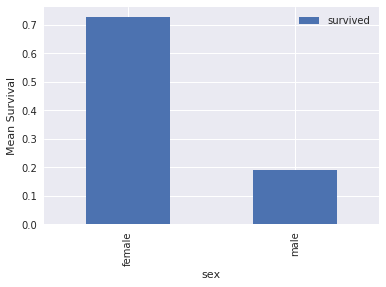

In [17]:
# mean survival by gender [females are drastically more likely to survive than males]

pd.pivot_table(df, index="sex", values="survived").plot(kind='bar')
plt.ylabel("Mean Survival")

In [18]:
# mean survival by passenger class [1st class more likely to survive]

pd.pivot_table(df, index= 'pclass', values= "survived")

,survived
pclass,
1,0.616822
2,0.429603
3,0.255289


In [19]:
# mean survival by passenger class, broken out by gender [women more likely to survive across all classes]

pd.pivot_table(df, index='pclass', columns='sex', values='survived')

sex,female,male
pclass,,
1,0.964789,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


In [20]:
# grouping age 

bins = [0,10,18,65,100]
groups = ['child','adolescent','adult','elderly']
df['agegrp'] = pd.cut(df['age'], bins, labels=groups)
pd.value_counts(df['agegrp'])


adult         1104
adolescent     107
child           86
elderly         10
Name: agegrp, dtype: int64

In [21]:
# mean survival by age group [young children most likely to survive]

pd.pivot_table(df, index='agegrp', values='survived', aggfunc=np.mean)

,survived
agegrp,
child,0.581395
adolescent,0.420561
adult,0.363225
elderly,0.200000


Text(0,0.5,'Mean Survival')

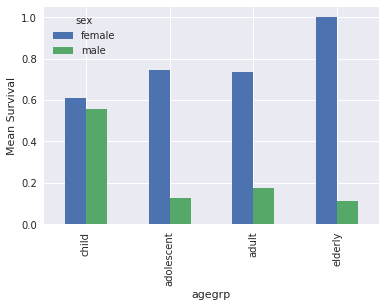

In [22]:
# mean survival by age group broken out by sex [females are more likely to survive across all age groups; especially elderly women]

pd.pivot_table(df, index='agegrp',columns='sex', values='survived').plot(kind = 'bar')
plt.ylabel("Mean Survival")

In [23]:
# mean price of ticket by survival status

pd.pivot_table(df, index="survived", values="fare")

,fare
survived,
0,23.353831
1,49.238136


In [24]:
# grouping fare 

fbins = [0,10, 50,100,600]
fgroups = ['0-10','11-50','51-100','100up']
df['faregrp'] = pd.cut(df['fare'], fbins, labels=fgroups)
pd.value_counts(df['faregrp'])

11-50     577
0-10      474
51-100    154
100up      84
Name: faregrp, dtype: int64

In [25]:
# mean survival by fare price [higher priced ticket holders were more likely to survive]

pd.pivot_table(df, index='faregrp', values='survived')

,survived
faregrp,
0-10,0.227848
11-50,0.402080
51-100,0.623377
100up,0.714286


Text(0,0.5,'Mean Survival')

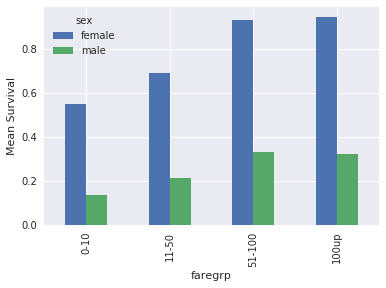

In [26]:
# mean survival by ticket fare, broken out by gender [women more likely to survive across all fare groups]

pd.pivot_table(df, index='faregrp', columns='sex',values='survived').plot(kind='bar')
plt.ylabel("Mean Survival")

In [27]:
# mean survival of passengers with family [those with family onboard were more likely to survive]

pd.pivot_table(df, index='hasFamily', values='survived')

,survived
hasFamily,
0,0.300761
1,0.502890


In [28]:
# mean survival of passengers with family broken out by gender [female passengers without family onboard were most likely to survive]

pd.pivot_table(df, index='hasFamily',columns = 'sex', values='survived')

sex,female,male
hasFamily,,
0,0.729167,0.162752
1,0.724265,0.259109


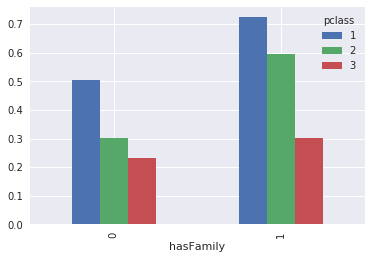

In [29]:
# mean survival of passengers with family, broken out by passenger class (passengers with a family onboard are more likely to survive across all three classes)

pd.pivot_table(df, index='hasFamily', columns='pclass', values='survived').plot(kind = 'bar')

In [30]:
# mean survival by family size [passengers with 0-3 family members onboard were most likely to survive]

pd.pivot_table(df, index='familysize', values='survived')

,survived
familysize,
0,0.300761
1,0.536170
2,0.566038
3,0.697674
4,0.272727
5,0.200000
6,0.250000
7,0.000000
10,0.000000


In [31]:
# mean family size by survival (no passengers with a family size over 6 survived)

pd.pivot_table(df, index='survived', values='familysize', aggfunc=[np.mean, min, max])

,mean,min,max
,familysize,familysize,familysize
survived,,,
0,0.850433,0,10
1,0.941767,0,6


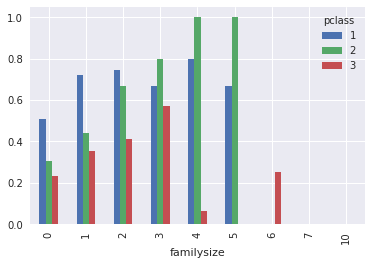

In [32]:
# mean survival by familysize, broken out by passenger class [upper class passengers with smaller families were more likely to survive; second class passengers with larger families were more likely to survive]

pd.pivot_table(df, index='familysize', columns='pclass', values='survived').plot(kind='bar')

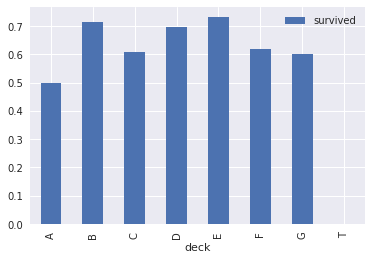

In [33]:
# mean survival by deck assignment

pd.pivot_table(df, index='deck', values='survived').plot(kind='bar')

In [34]:
# mean survival by deck assignment by gender (2nd class passengers on F deck? most likely to survive)

pd.pivot_table(df, index='deck', columns='pclass', values="survived")

pclass,1,2,3
deck,,,
A,0.500000,NaN,NaN
B,0.714286,NaN,NaN
C,0.606383,NaN,NaN
D,0.700000,0.666667,NaN
E,0.705882,0.750000,1.000
F,NaN,0.769231,0.375
G,NaN,NaN,0.600
T,0.000000,NaN,NaN


In [35]:
# mean survival by life boat assignment (those with a cabin assignment are more likely to survive)

pd.pivot_table(df, index="cabinAssign", values="survived")

,survived
cabinAssign,
0,0.302761
1,0.651877


In [36]:
# mean survival by embarkment location [passengers leaving from Cherbourg are most likely to survive]

pd.pivot_table(df, index='embarked', values='survived')

##C = Cherbourg, Q = Queenstown, S = Southampton

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


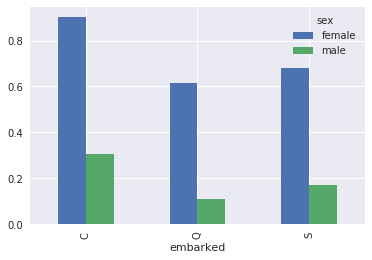

In [37]:
# mean survival by embarkment location broken out by gender [women are more likely to survive regardless of where they are leaving from]

pd.pivot_table(df, index="embarked", columns="sex", values="survived").plot(kind='bar')

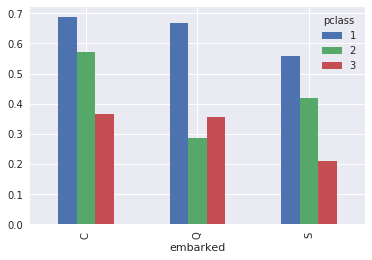

In [38]:
# mean survival by embarkment location broken out by class [1st class passengers are most likely to survive regardless of where they are leaving from]

pd.pivot_table(df, index="embarked",columns="pclass", values="survived").plot(kind='bar')

## Correlation and Pivot Table summary... 

From the correlation matrix and series of pivot tables, the data shows the following: 

Women are more likely to survive when compared to men. This holds true across several factors, including: passenger class, age group, ticket price, and embarkment location. Specifically, first class women are the most likely to survive. When compared to those with families onboard, women without other family onboard are more likely to survive. 

First class passengers are most likely to survive across all other passenger classes. More specifically, 1st class passengers with small or no families (0-3 members) are most likely to survive, followed by 2nd class passengers with larger families. 

Other factors - those who paid higher ticket fares ($100+) were more likely to survive, as well as those who have a documented cabin assignment. Those with at least one family member onboard are also more likely to survive. 